In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('dataset/all_data.csv')

In [3]:
data.head(3)

,Course Absence Rate,PF,FIN,TOTAL,LG
0,0.03,0.92,0.36,70,C+
1,0.25,1.00,0.28,71,C+
2,0.29,0.90,0.10,58,D+


In [4]:
def class_type(total):
    if 75 <= total <= 100:
        class_type = 3
    elif 50 <= total < 75:
        class_type = 2
    else:
        class_type = 1
    return class_type

In [5]:
data['Class'] = data['TOTAL'].apply(lambda x: class_type(x))

In [6]:
data

,Course Absence Rate,PF,FIN,TOTAL,LG,Class
0,0.03,0.92,0.36,70,C+,2
1,0.25,1.00,0.28,71,C+,2
2,0.29,0.90,0.10,58,D+,2
3,0.10,0.87,0.13,57,D+,2
4,0.10,0.85,0.10,55,D+,2
...,...,...,...,...,...,...
200,0.11,0.62,0.50,57,D+,2
201,0.07,0.50,1.00,70,C+,2
202,0.00,0.80,1.00,88,B+,3
203,0.04,0.87,1.00,92,A-,3


The dataset consists of the following columns:

- **Course Absence Rate**: Proportion of classes missed.
- **PF (Pre-final score)**: Score before the final exam.
- **FIN (Final exam score)**: Score on the final exam.
- **TOTAL**: Total score for the course.
- **LG (Letter Grade)**: Letter grade for the course.
- **Class**: Risk class indicating the student's performance level (1: Extremely unsatisfactory, 2: Undesirable, 3: Acceptable/Desirable).

### Exploratory Data Analysis (EDA)

1. **Statistical Summary**: Generate descriptive statistics for numerical columns.
2. **Missing Values**: Check for any missing values.
3. **Distribution Plots**: Visualize the distribution of each numerical feature.
4. **Correlation Analysis**: Analyze the correlation between features.
5. **Class Distribution**: Examine the distribution of the `Class` variable.
6. **Scatter Plots**: Create scatter plots to observe relationships between features and the target variable (`Class`).

In [7]:
data['TOTAL'] = data['TOTAL']/100

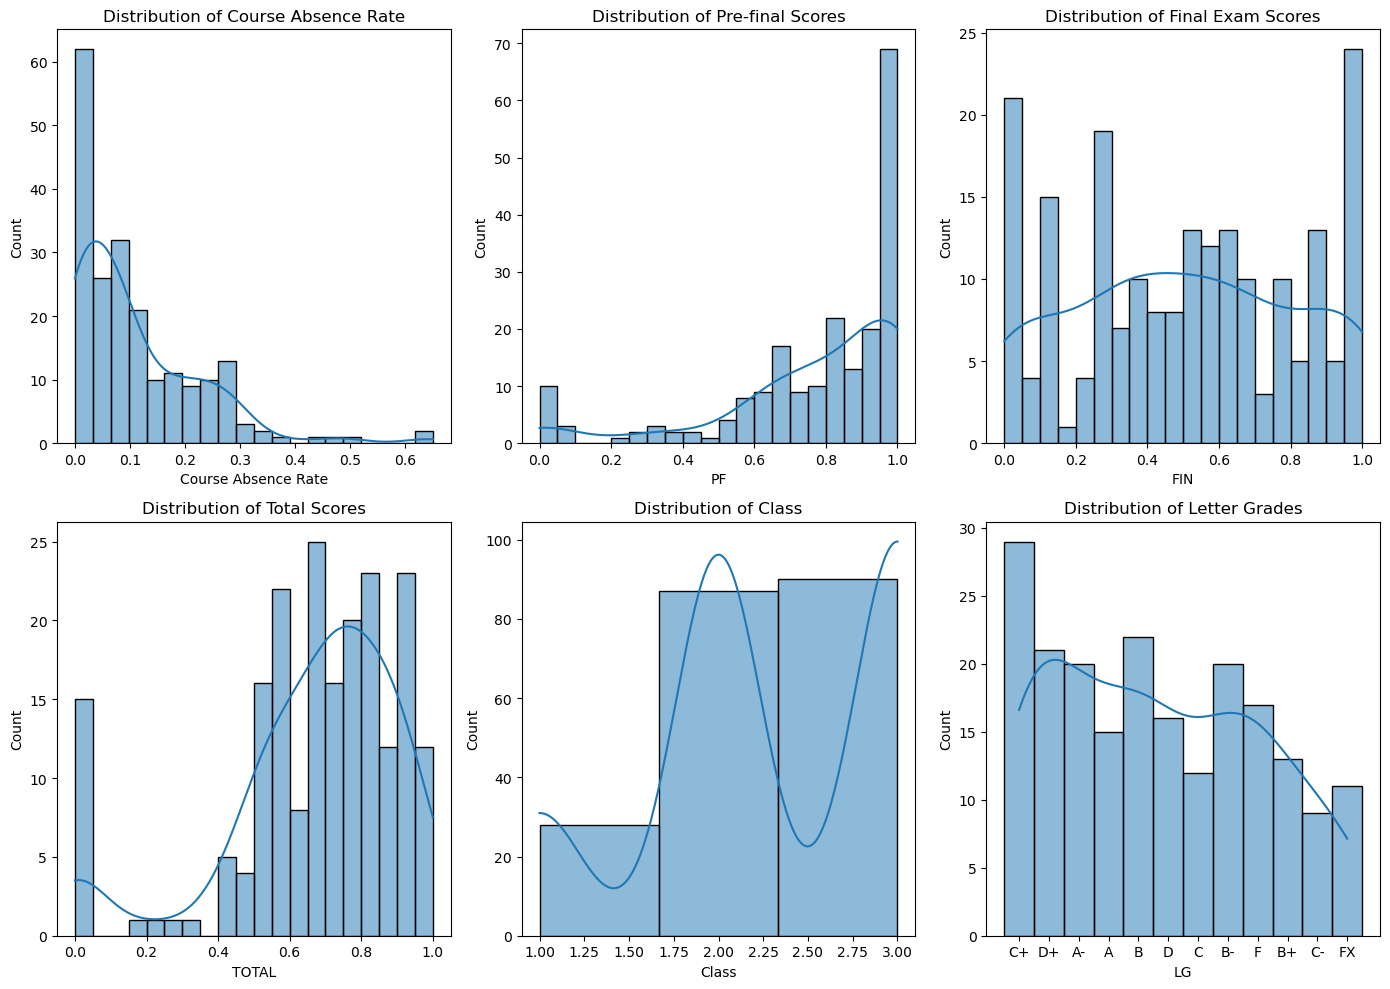

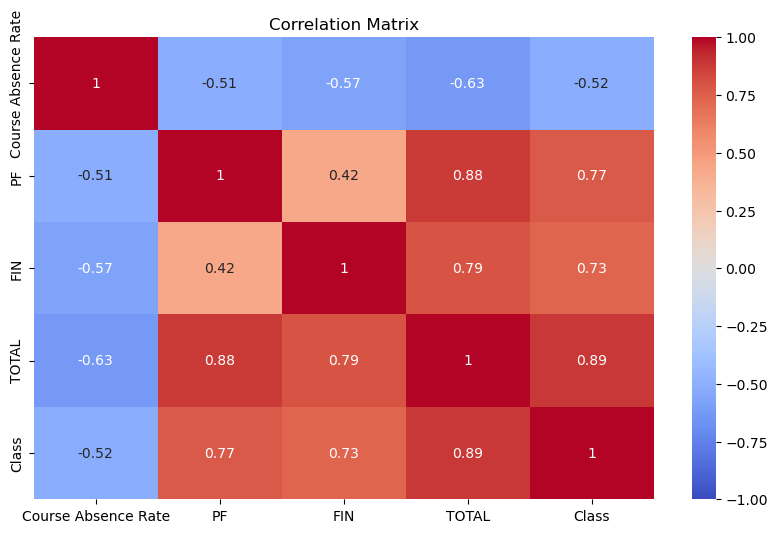

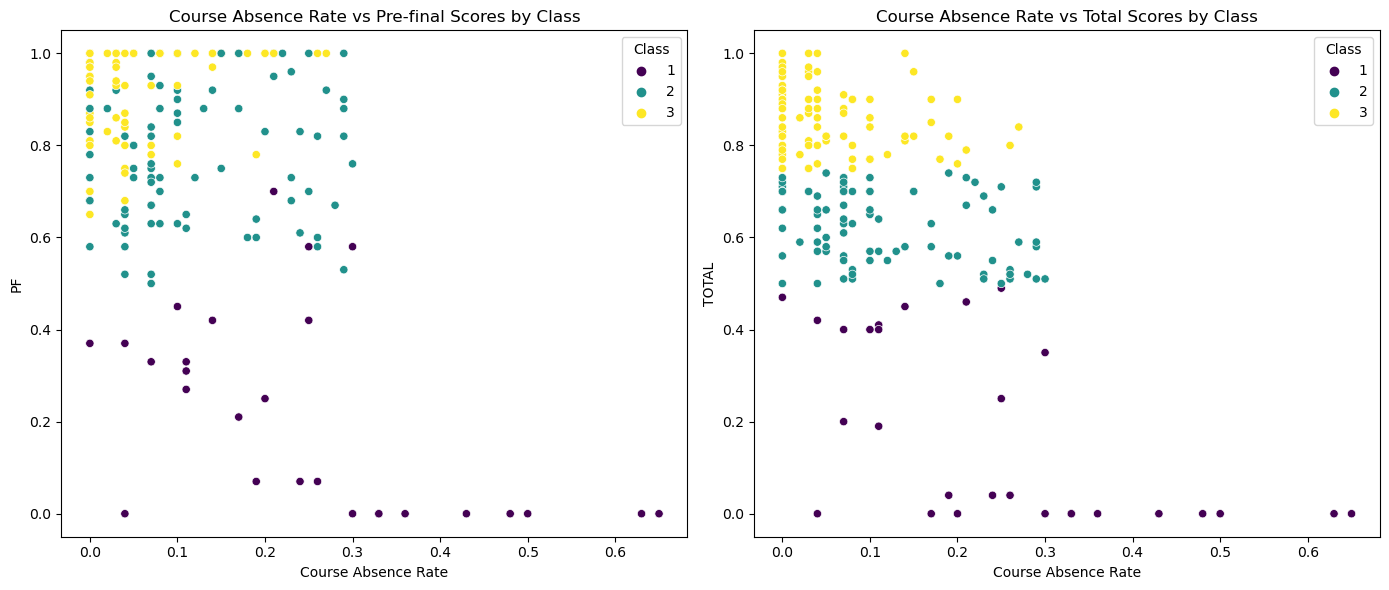

(       Course Absence Rate          PF         FIN       TOTAL       Class
 count           205.000000  205.000000  205.000000  205.000000  205.000000
 mean              0.107122    0.774878    0.505512    0.667415    2.302439
 std               0.115504    0.267987    0.317103    0.244732    0.697505
 min               0.000000    0.000000    0.000000    0.000000    1.000000
 25%               0.030000    0.670000    0.250000    0.560000    2.000000
 50%               0.070000    0.850000    0.500000    0.710000    2.000000
 75%               0.170000    1.000000    0.750000    0.840000    3.000000
 max               0.650000    1.000000    1.000000    1.000000    3.000000,
 Course Absence Rate    0
 PF                     0
 FIN                    0
 TOTAL                  0
 LG                     0
 Class                  0
 dtype: int64,
 3    90
 2    87
 1    28
 Name: Class, dtype: int64)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Statistical Summary
summary = data.describe()

# 2. Missing Values
missing_values = data.isnull().sum()

# 3. Distribution Plots
plt.figure(figsize=(14, 10))

plt.subplot(2, 3, 1)
sns.histplot(data['Course Absence Rate'], kde=True, bins=20)
plt.title('Distribution of Course Absence Rate')

plt.subplot(2, 3, 2)
sns.histplot(data['PF'], kde=True, bins=20)
plt.title('Distribution of Pre-final Scores')

plt.subplot(2, 3, 3)
sns.histplot(data['FIN'], kde=True, bins=20)
plt.title('Distribution of Final Exam Scores')

plt.subplot(2, 3, 4)
sns.histplot(data['TOTAL'], kde=True, bins=20)
plt.title('Distribution of Total Scores')

plt.subplot(2, 3, 5)
sns.histplot(data['Class'], kde=True, bins=3)
plt.title('Distribution of Class')

plt.subplot(2, 3, 6)
sns.histplot(data['LG'], kde=True, bins=20)
plt.title('Distribution of Letter Grades')

plt.tight_layout()
plt.show()

# 4. Correlation Analysis
correlation_matrix = data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# 5. Class Distribution
class_distribution = data['Class'].value_counts()

# 6. Scatter Plots
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Course Absence Rate', y='PF', hue='Class', data=data, palette='viridis')
plt.title('Course Absence Rate vs Pre-final Scores by Class')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Course Absence Rate', y='TOTAL', hue='Class', data=data, palette='viridis')
plt.title('Course Absence Rate vs Total Scores by Class')

plt.tight_layout()
plt.show()

summary, missing_values, class_distribution


### Summary of Exploratory Data Analysis (EDA)

1. **Statistical Summary**:
   - The dataset has 205 entries.
   - Course Absence Rate ranges from 0.00 to 0.65.
   - Pre-final (PF) and Final (FIN) scores range from 0.00 to 1.00.
   - Total scores range from 0 to 100.
   - Risk Classes are distributed as follows: 28 in Class 1, 87 in Class 2, and 90 in Class 3.

2. **Missing Values**:
   - No missing values in the dataset.

3. **Distribution Plots**:
   - Course Absence Rate: Most students have low absence rates.
   - Pre-final Scores: Most students score high on pre-final exams.
   - Final Scores: The scores are more uniformly distributed compared to pre-final scores.
   - Total Scores: The distribution shows a wide range of scores.
   - Class Distribution: Class 3 (Acceptable/Desirable) is the most common, followed by Class 2 (Undesirable), and then Class 1 (Extremely unsatisfactory).
   - Letter Grades: A variety of grades are present, with no single grade dominating.

4. **Correlation Analysis**:
   - Pre-final scores and Total scores have a strong positive correlation.
   - Course Absence Rate has a moderate negative correlation with both PF and Total scores.
   - The heatmap indicates that final scores (FIN) are less correlated with other scores.

5. **Class Distribution**:
   - Majority of the students fall into Class 3, followed by Class 2, and the least number in Class 1.

6. **Scatter Plots**:
   - Clear separation between classes is observed when plotting Course Absence Rate against PF and Total scores.
   - Higher absence rates tend to correspond with lower PF and Total scores, and these are more likely to belong to Class 1 or Class 2.


### Neural Network Model
We'll build a neural network model that predicts the risk class (1, 2, or 3) based on the Course Absence Rate and Pre-final scores (PF).


We'll use the following steps:
1. **Data Preprocessing**: Normalize the input features.
2. **Model Architecture**: Define the neural network structure.
3. **Training**: Train the model on the dataset.
4. **Evaluation**: Evaluate the model's performance.

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Step 1: Data Preprocessing

In [10]:
# Selecting features and target
X = data[['Course Absence Rate', 'PF']].values
y = data['Class'].values

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train - 1, dtype=torch.long)  # Classes should be zero-indexed
y_test_tensor = torch.tensor(y_test - 1, dtype=torch.long)

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=10, shuffle=False)

# Step 2: Model Architecture

In [11]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(2, 16)
        self.fc2 = nn.Linear(16, 8)
        self.fc3 = nn.Linear(8, 3)
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.softmax(self.fc3(x), dim=1)
        return x

NN = SimpleNN()

# Step 3: Training

In [12]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(NN.parameters(), lr=0.001)

# Training loop
epochs = 50
train_losses = []
val_losses = []
for epoch in range(epochs):
    NN.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        
        optimizer.zero_grad()
        outputs = NN(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_losses.append(running_loss / len(train_loader))
    
    # Validation loss
    NN.eval()
    val_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = NN(X_batch)
            loss = criterion(outputs, y_batch)
            val_loss += loss.item()
    val_losses.append(val_loss / len(test_loader))

# Step 4: Evaluation

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.71      0.75        17
           2       0.76      0.84      0.80        19

    accuracy                           0.80        41
   macro avg       0.85      0.85      0.85        41
weighted avg       0.81      0.80      0.80        41

Accuracy: 0.8048780487804879


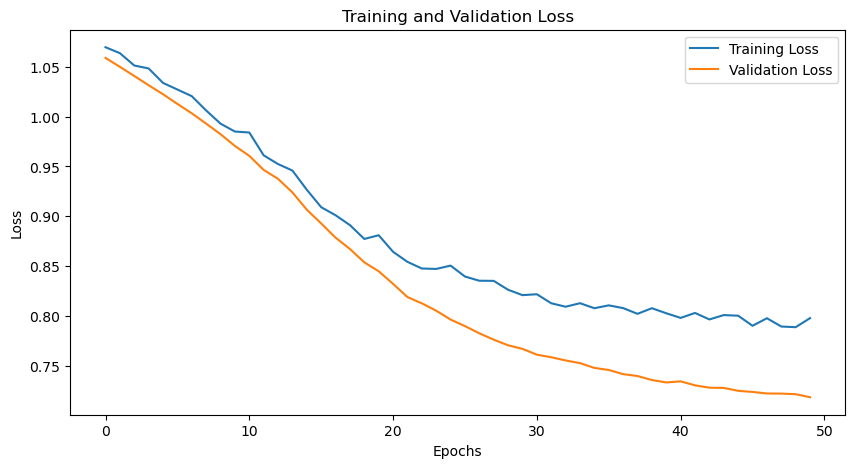

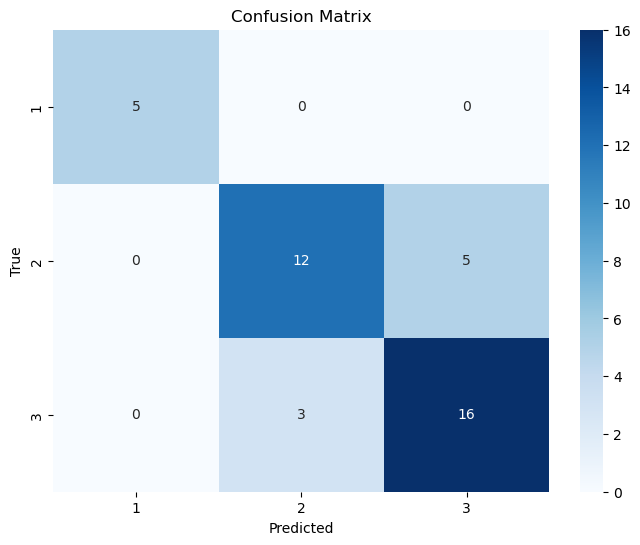

In [13]:
# Evaluate on test data
NN.eval()
all_preds = []
all_labels = []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = NN(X_batch)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.numpy())
        all_labels.extend(y_batch.numpy())

# Generating classification report
report = classification_report(all_labels, all_preds)
accuracy = accuracy_score(all_labels, all_preds)

print("Classification Report:\n", report)
print("Accuracy:", accuracy)

# Plotting training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(range(epochs), train_losses, label='Training Loss')
plt.plot(range(epochs), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Confusion Matrix
conf_matrix = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [14]:
# Evaluate on test data
NN.eval()
all_preds = []
all_labels = []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = NN(X_batch)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.numpy())
        all_labels.extend(y_batch.numpy())

# Generating classification report
report = classification_report(all_labels, all_preds)
accuracy = accuracy_score(all_labels, all_preds)

print("Classification Report:\n", report)
print("Accuracy:", accuracy)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.80      0.71      0.75        17
           2       0.76      0.84      0.80        19

    accuracy                           0.80        41
   macro avg       0.85      0.85      0.85        41
weighted avg       0.81      0.80      0.80        41

Accuracy: 0.8048780487804879


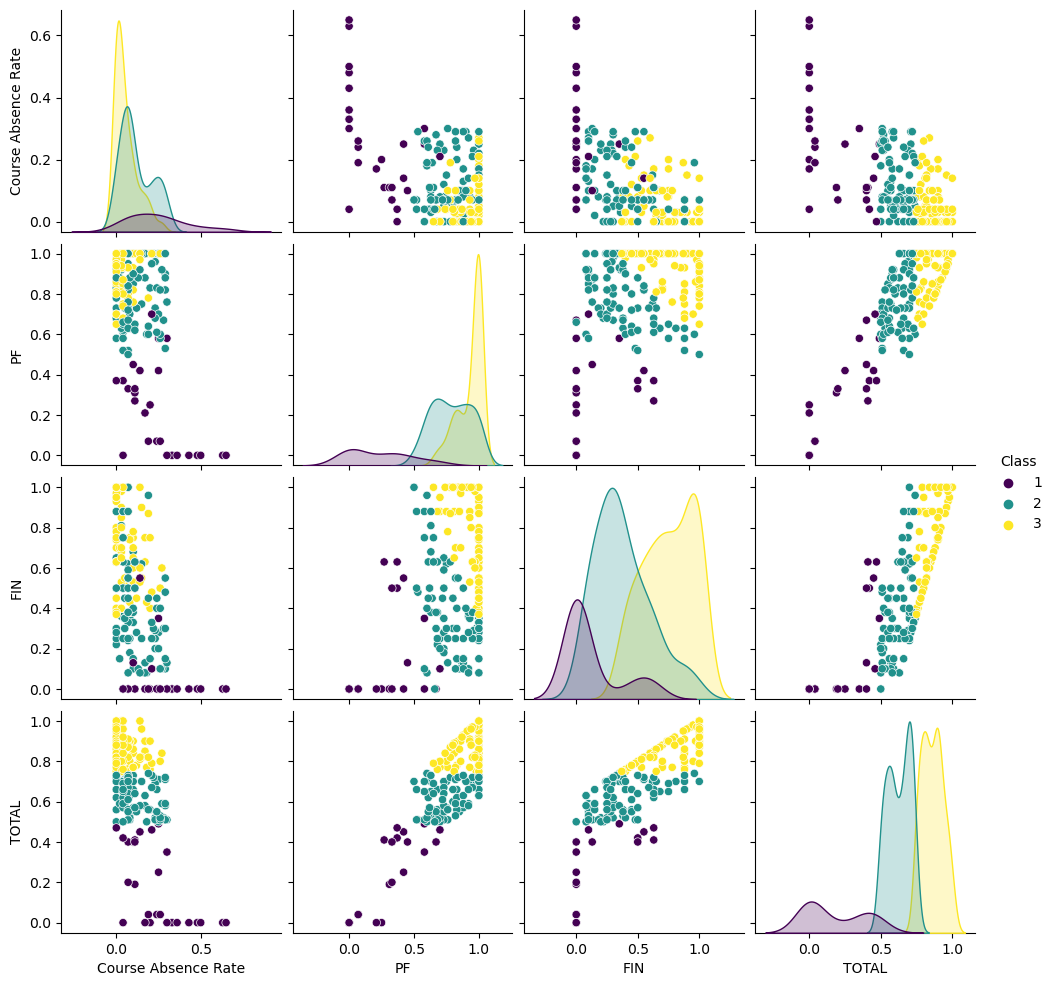

In [15]:
sns.pairplot(data, hue='Class', palette='viridis')
plt.show()

# Model Comparison

                    Model  Precision  Recall  F1-Score  Accuracy  Err_3_1
0           Random forest       0.89    0.89      0.89      0.85     0.00
1     Logistic Regression       0.85    0.85      0.85      0.80     0.00
2  Naive Bayes classifier       0.85    0.85      0.85      0.80     0.00
3                 K-means       0.80    0.66      0.69      0.68     0.05
4          Neural Network       0.85    0.85      0.85      0.80     0.00


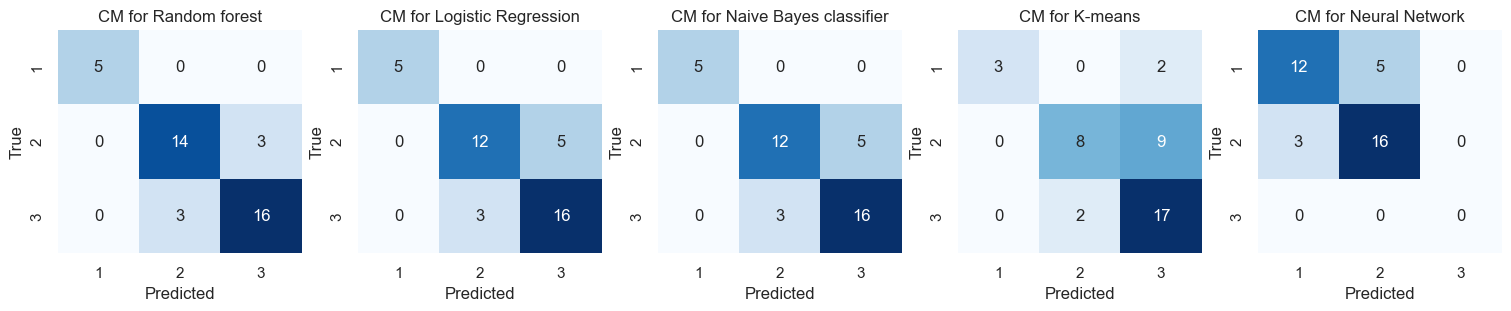

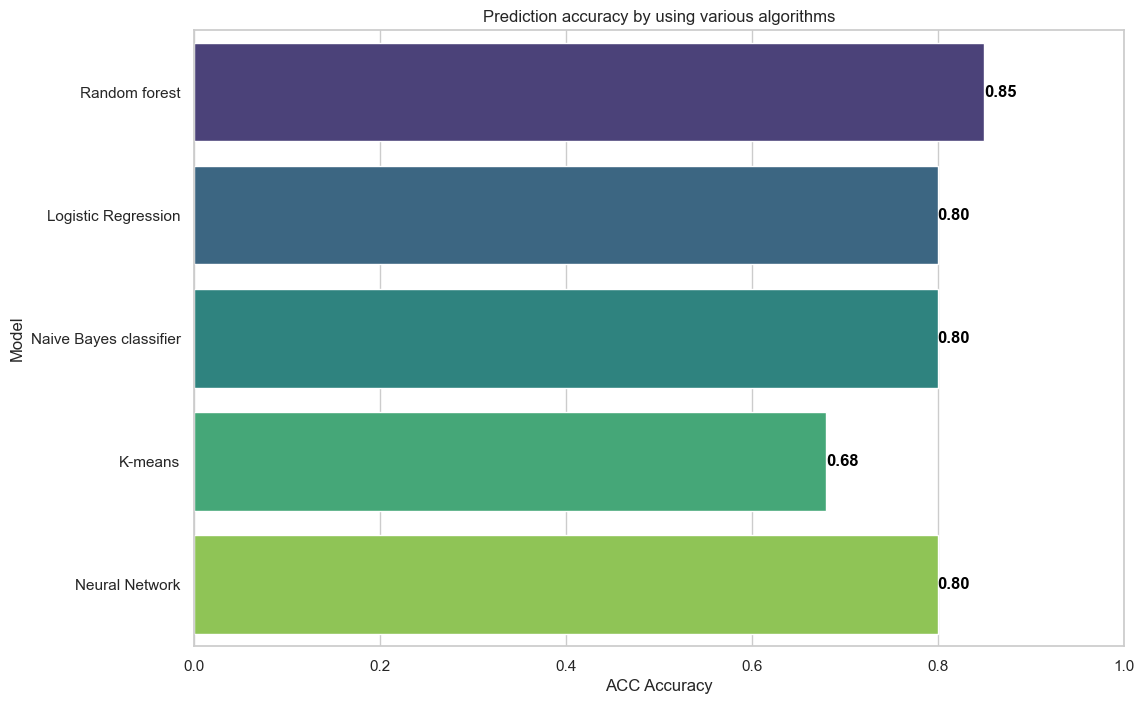

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize models
models = {
    'Random forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes classifier': GaussianNB(),
    'K-means': KMeans(n_clusters=3)
}

# Function to calculate metrics
def calculate_metrics(y_true, y_pred):
    precision = precision_score(y_true, y_pred, average='macro', zero_division=0)
    recall = recall_score(y_true, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='macro', zero_division=0)
    accuracy = accuracy_score(y_true, y_pred)
    return precision, recall, f1, accuracy

# Function to calculate err_{3,1}
def calculate_err_3_1(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred, labels=[1, 2, 3])
    err_3_1 = cm[0, 2] / np.sum(cm)
    return err_3_1

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name, ax):
    cm = confusion_matrix(y_true, y_pred, labels=[1, 2, 3])
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[1, 2, 3], yticklabels=[1, 2, 3], ax=ax, cbar=False)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ax.set_title(f'CM for {model_name}')
    
# DataFrame to store the results
results = pd.DataFrame(columns=['Model', 'Precision', 'Recall', 'F1-Score', 'Accuracy', 'Err_3_1'])

# Prepare for subplots
num_models = len(models) + 1  # Including Neural Network
fig, axes = plt.subplots(1, num_models, figsize=(15, 3), constrained_layout=True)

# Train and evaluate other models
for idx, (name, model) in enumerate(models.items()):
    if name == 'K-means':
        model.fit(X_train_scaled)
        y_pred = model.predict(X_test_scaled)
        # Assign cluster labels based on majority class in each cluster
        cluster_labels = np.zeros_like(y_pred)
        for i in range(3):  # исправлено на 3, если у вас 3 кластера
            mask = (model.labels_ == i)
            if np.any(mask):  # Проверка наличия элементов в кластере
                cluster_labels[y_pred == i] = np.argmax(np.bincount(y_train[mask]))
        y_pred = cluster_labels
    else:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    
    precision, recall, f1, accuracy = calculate_metrics(y_test, y_pred)
    err_3_1 = calculate_err_3_1(y_test, y_pred)
    result = pd.DataFrame([[name, round(precision, 2), round(recall, 2), round(f1, 2), round(accuracy, 2), round(err_3_1, 2)]],
                          columns=['Model', 'Precision', 'Recall', 'F1-Score', 'Accuracy', 'Err_3_1'])
    results = pd.concat([results, result], ignore_index=True)
    plot_confusion_matrix(y_test, y_pred, name, axes[idx])
    
precision, recall, f1, accuracy = calculate_metrics(all_labels, all_preds)
err_3_1 = calculate_err_3_1(all_labels, all_preds)
result = pd.DataFrame([['Neural Network', round(precision,2), round(recall,2), round(f1,2), round(accuracy,2), round(err_3_1, 2)]], columns=['Model', 'Precision', 'Recall', 'F1-Score', 'Accuracy', 'Err_3_1'])
results = pd.concat([results, result], ignore_index=True)
plot_confusion_matrix(all_labels, all_preds, 'Neural Network', axes[-1])
# Display the results
print(results)
fig.savefig('cm_models.png')

# Plotting the results
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
names = results['Model']
scores = results['Accuracy']

ax = sns.barplot(x=scores, y=names, palette="viridis")
plt.xlabel('ACC Accuracy')
plt.title('Prediction accuracy by using various algorithms')
plt.xlim(0, 1)  # Ожидаемый диапазон для точности

# Добавление значений на столбцы
for index, value in enumerate(scores):
    plt.text(value, index, f'{value:.2f}', va='center', ha='left', color='black', fontweight='bold')


plt.savefig("compair_models_acc.png")
plt.show()

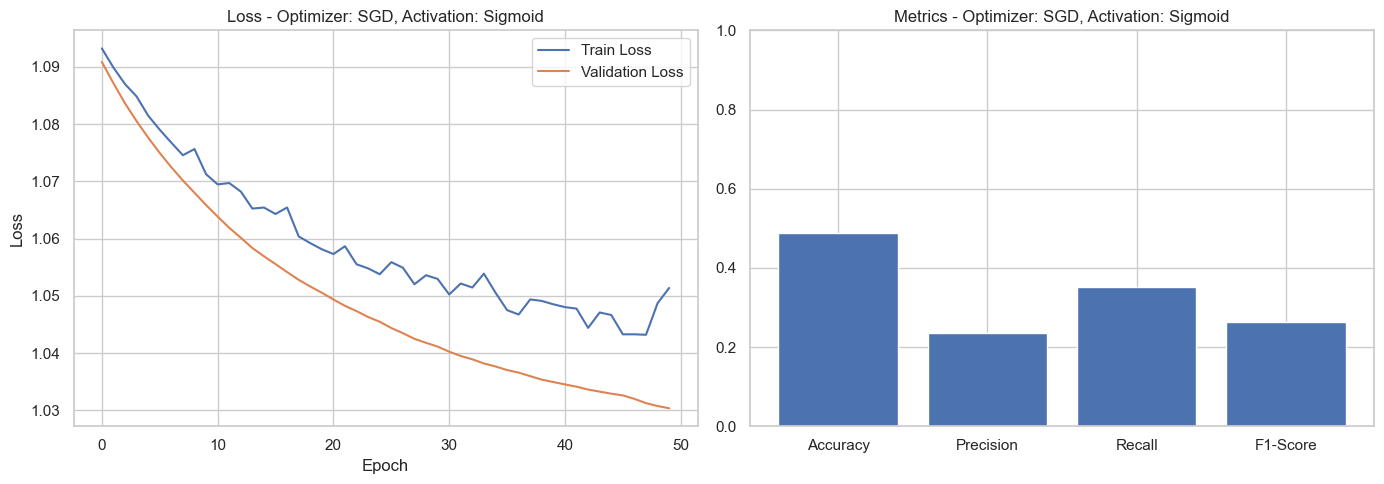

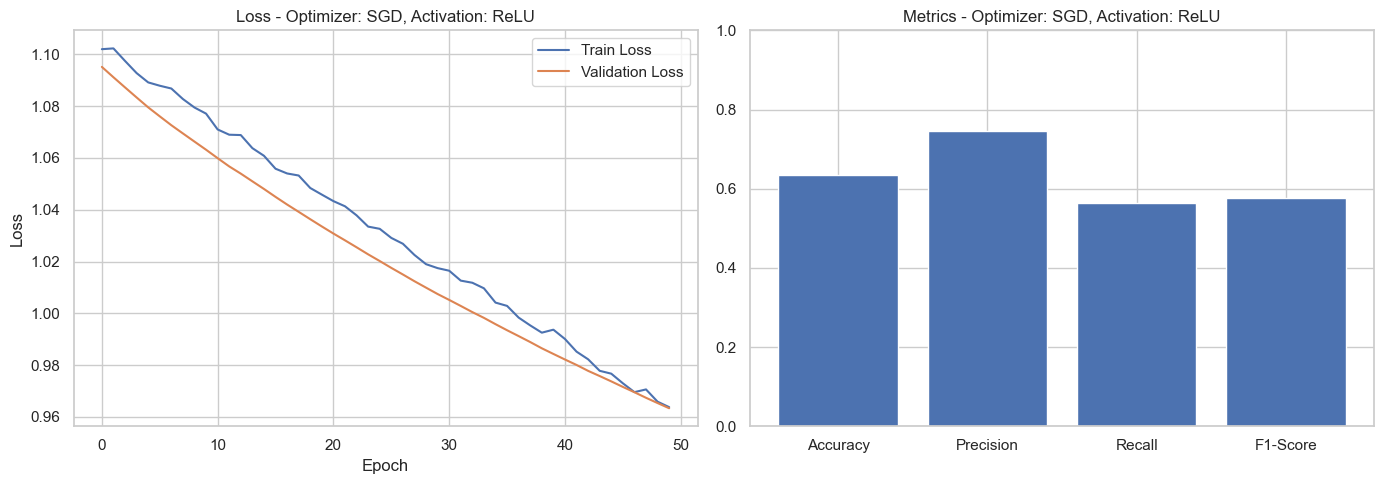

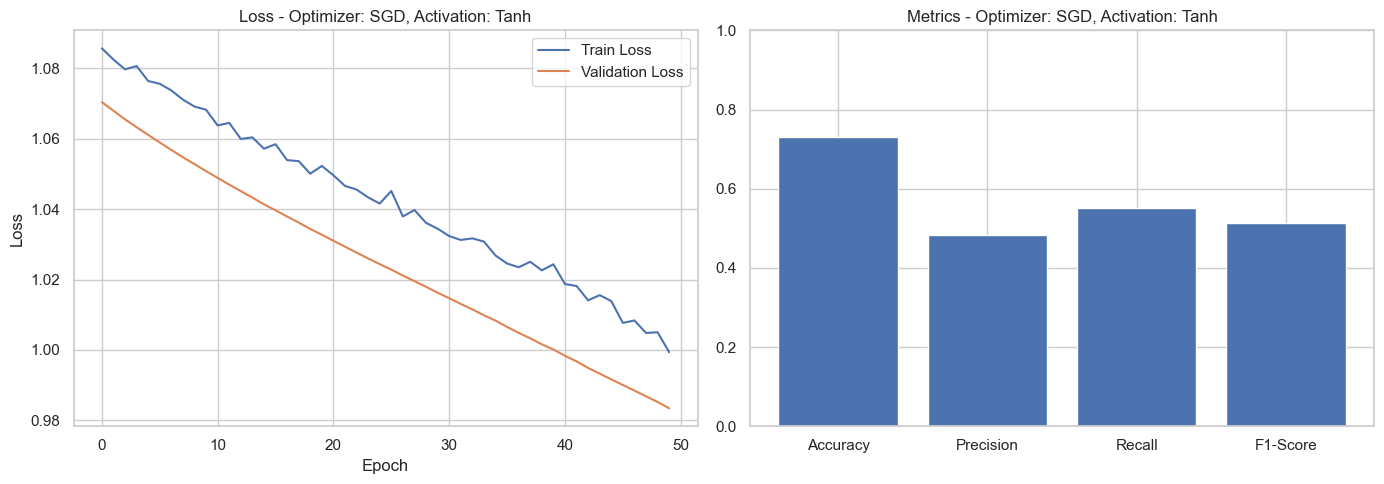

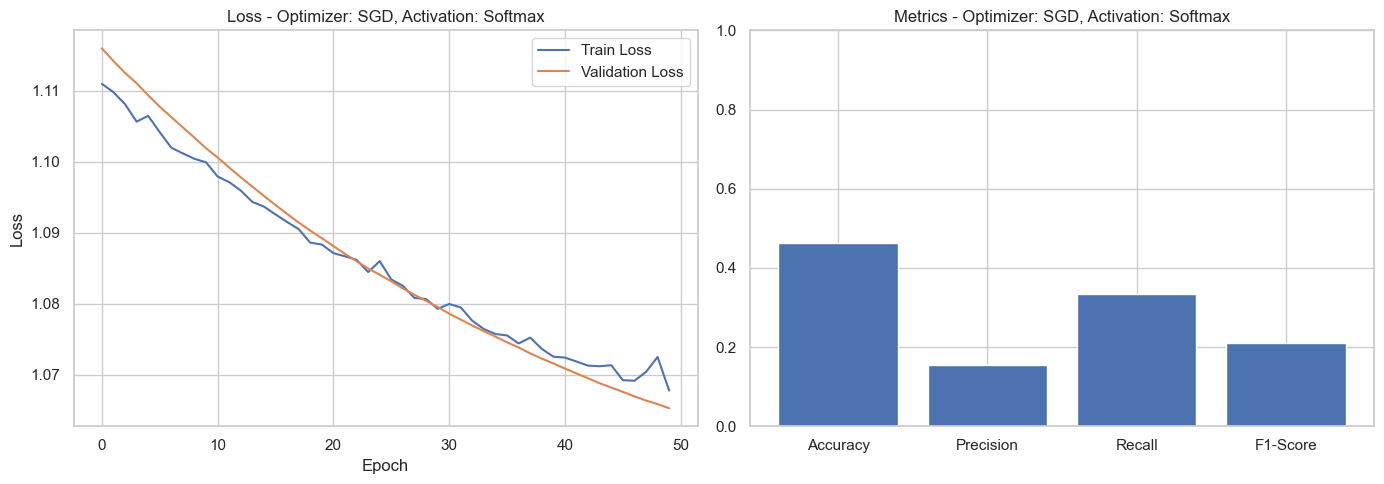

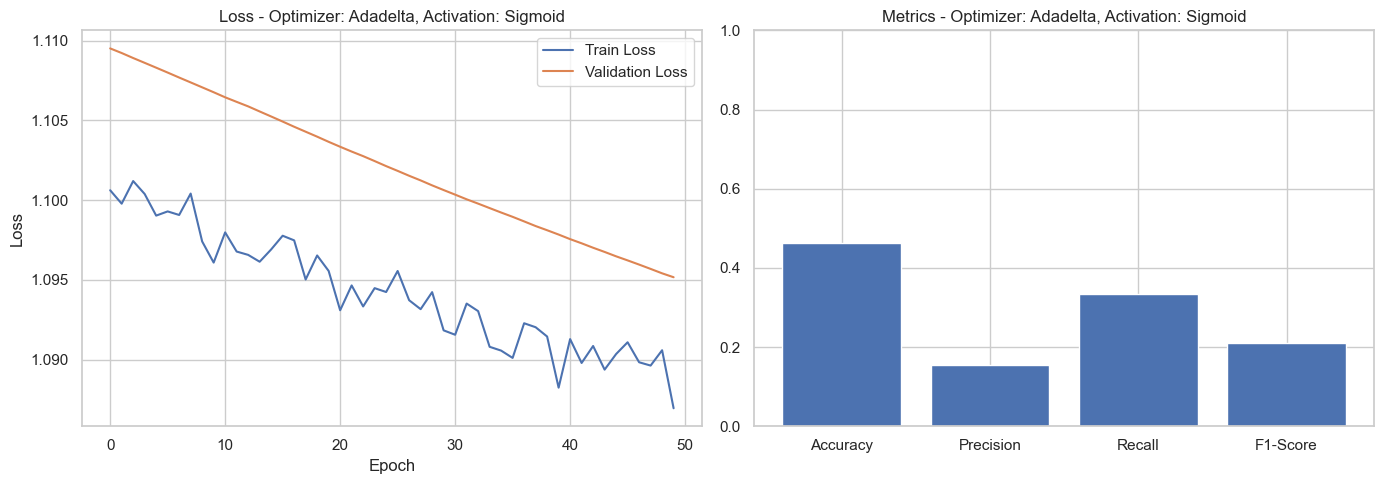

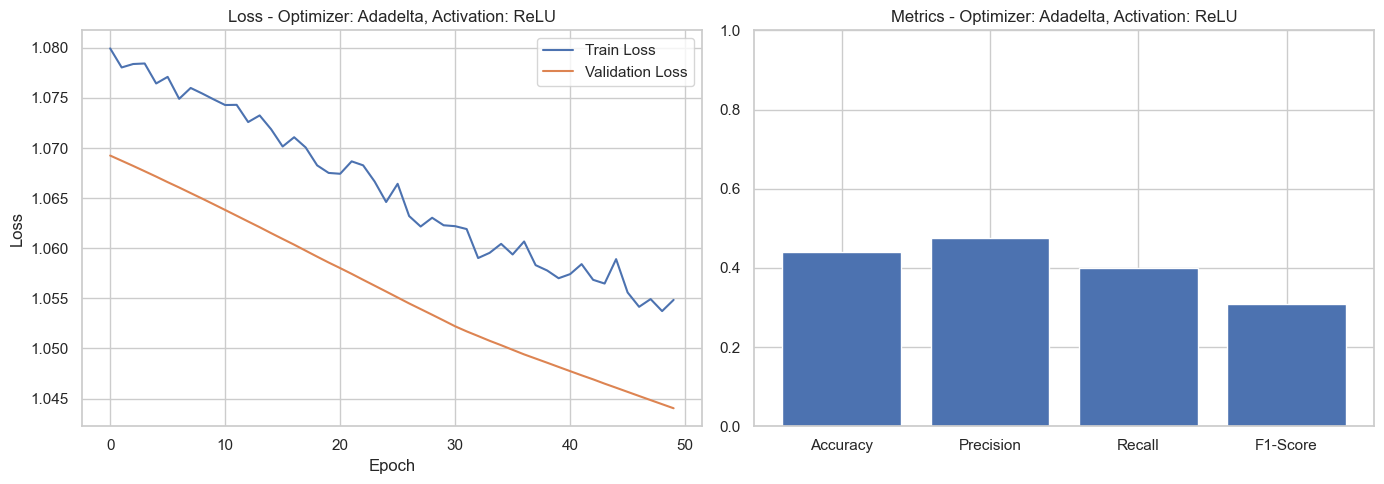

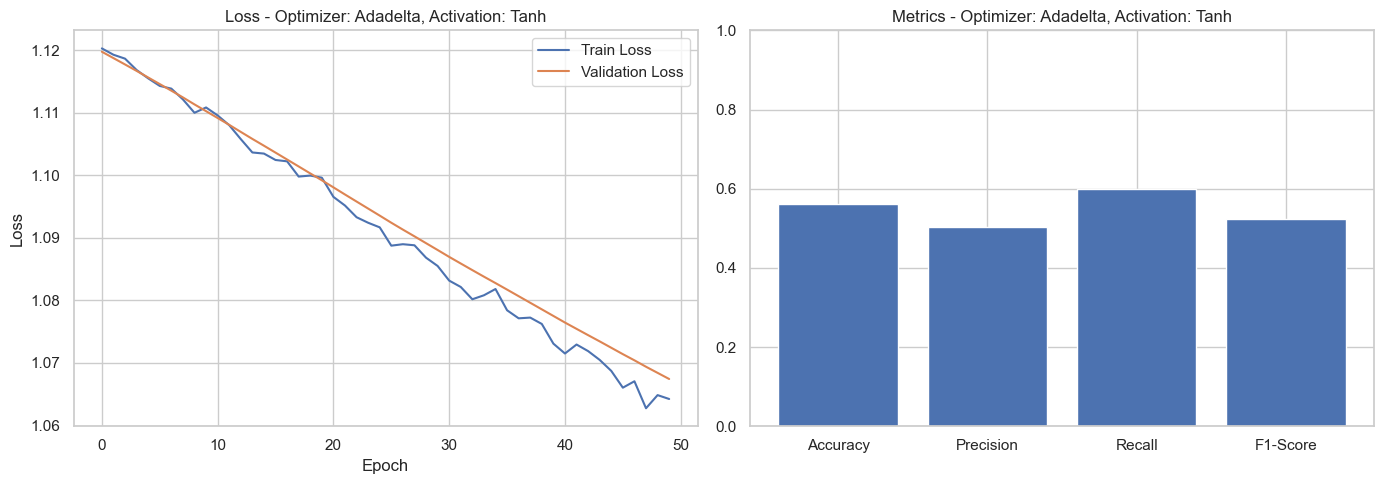

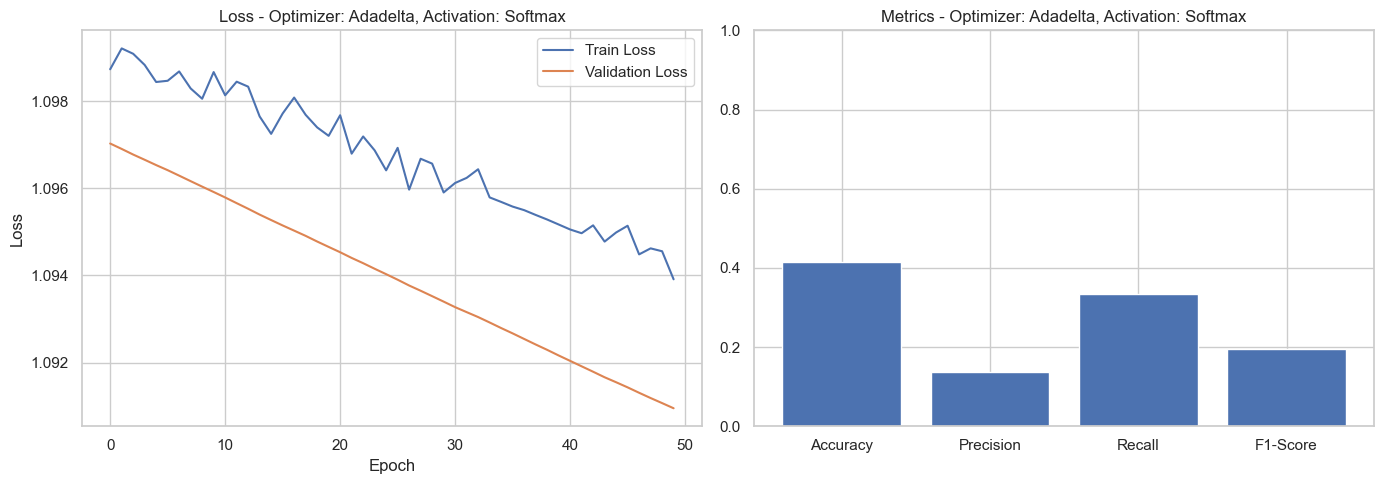

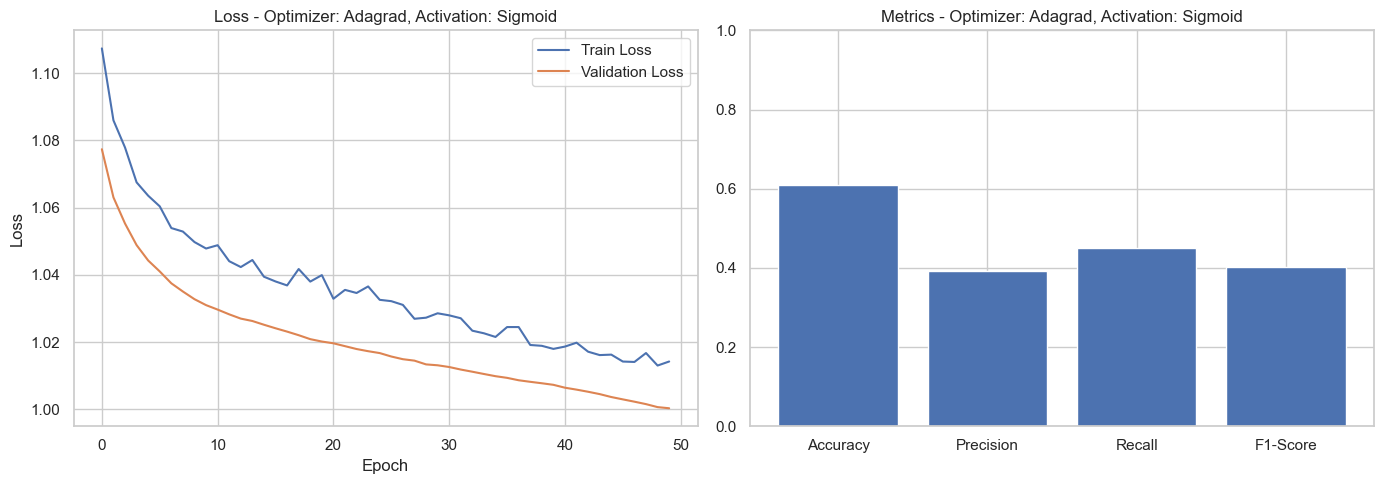

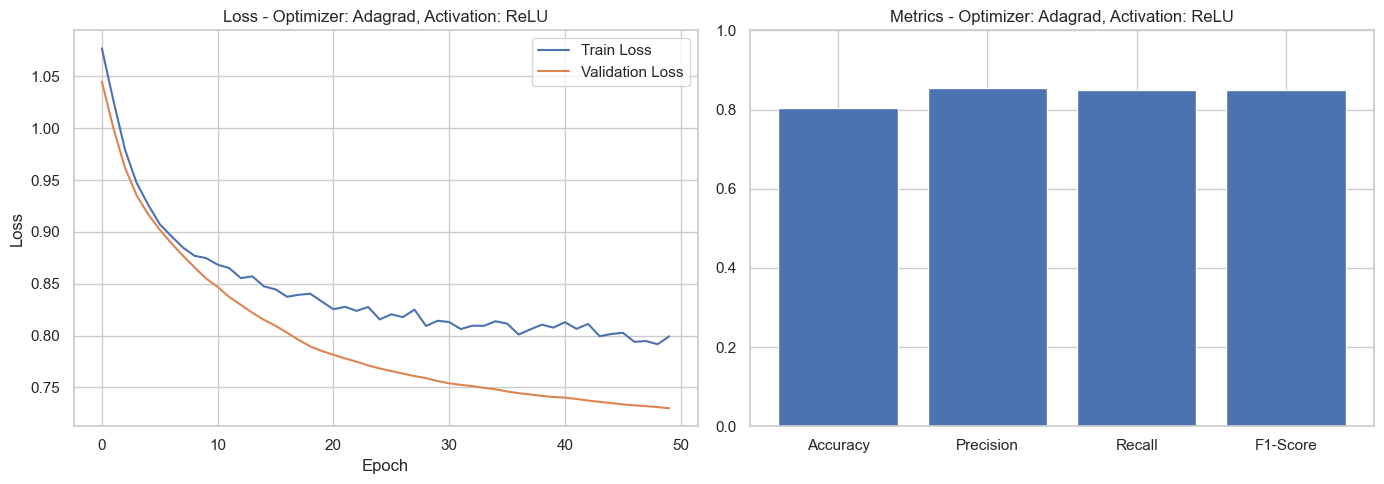

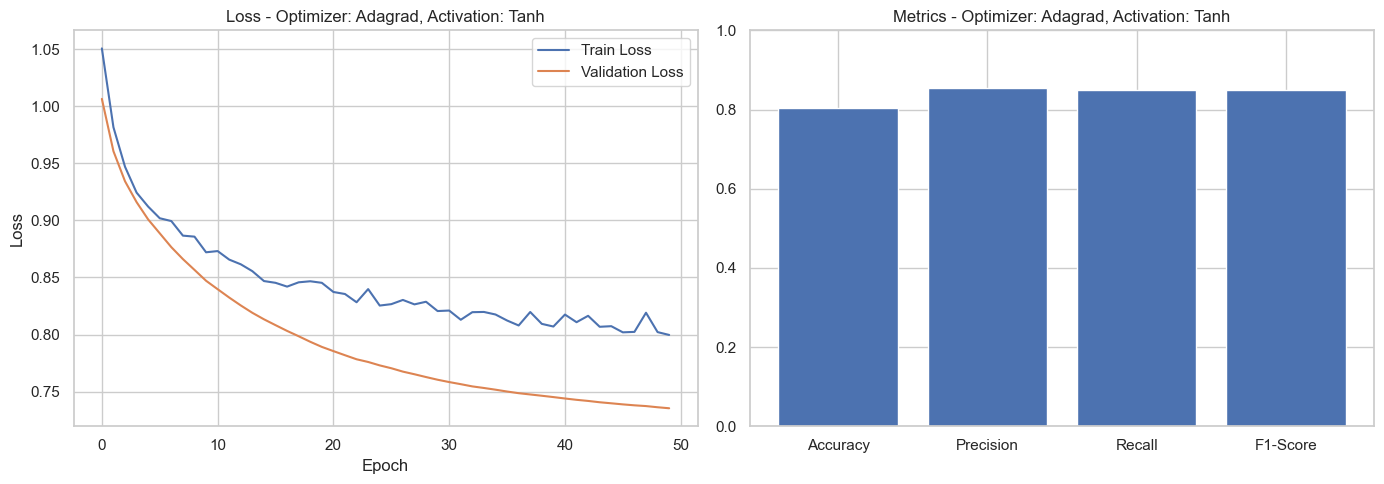

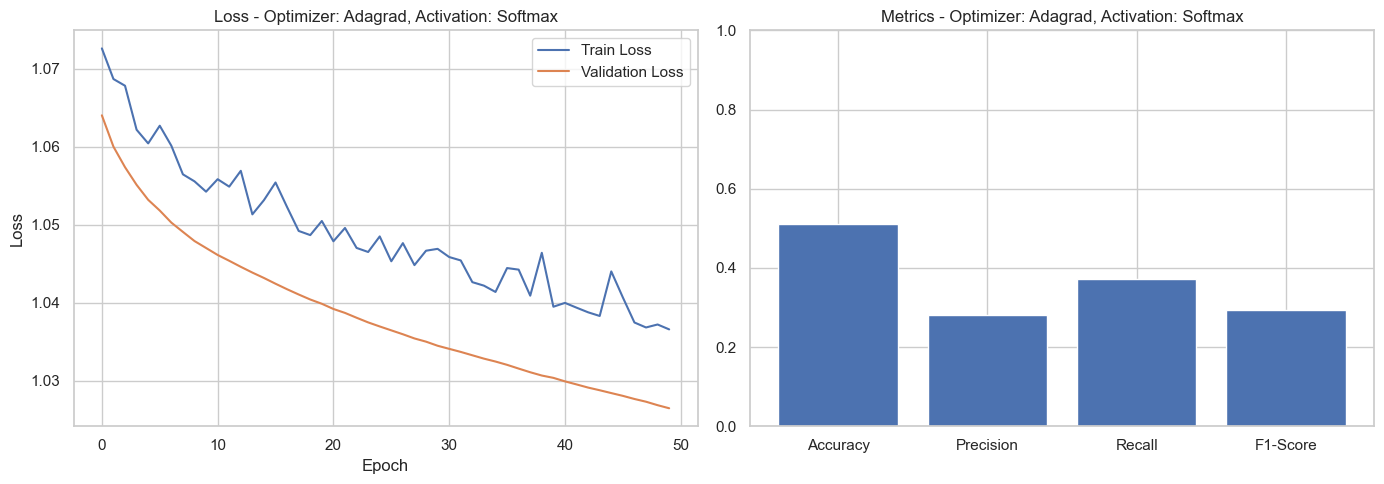

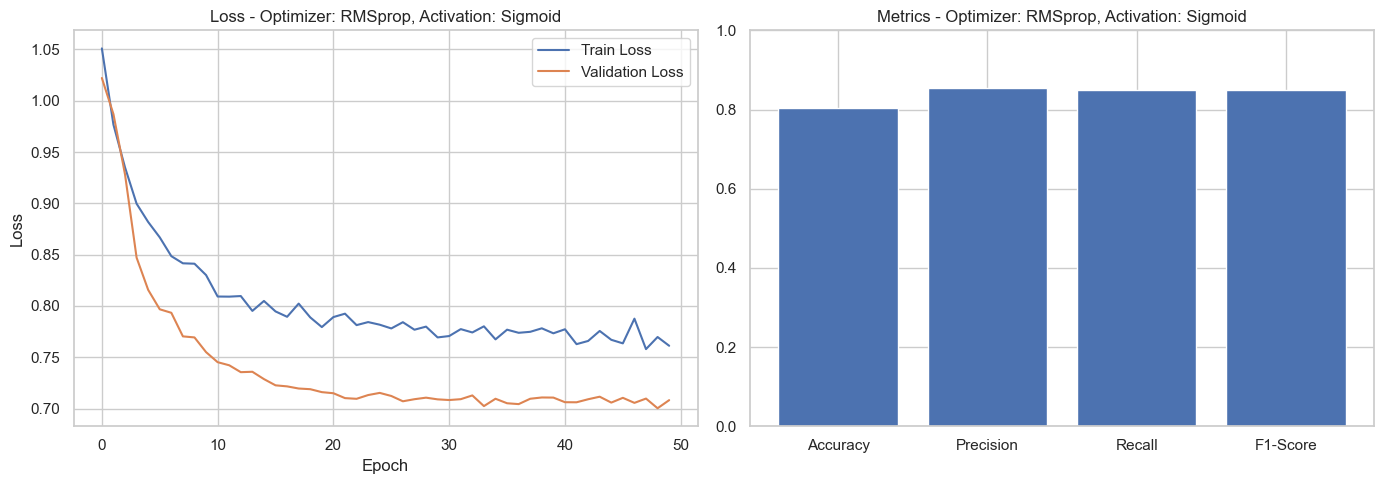

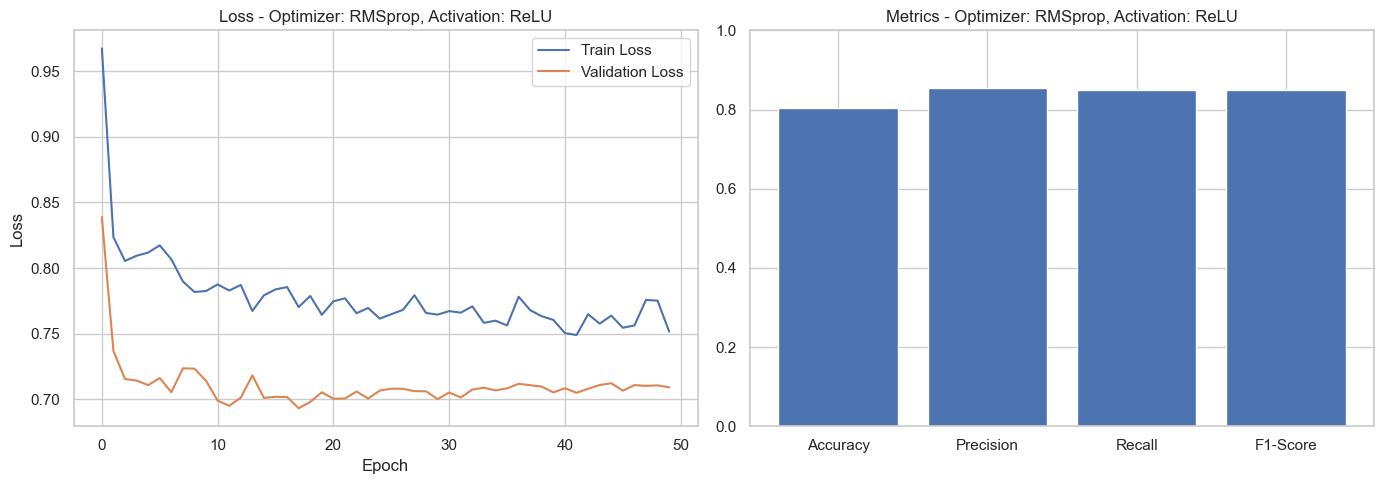

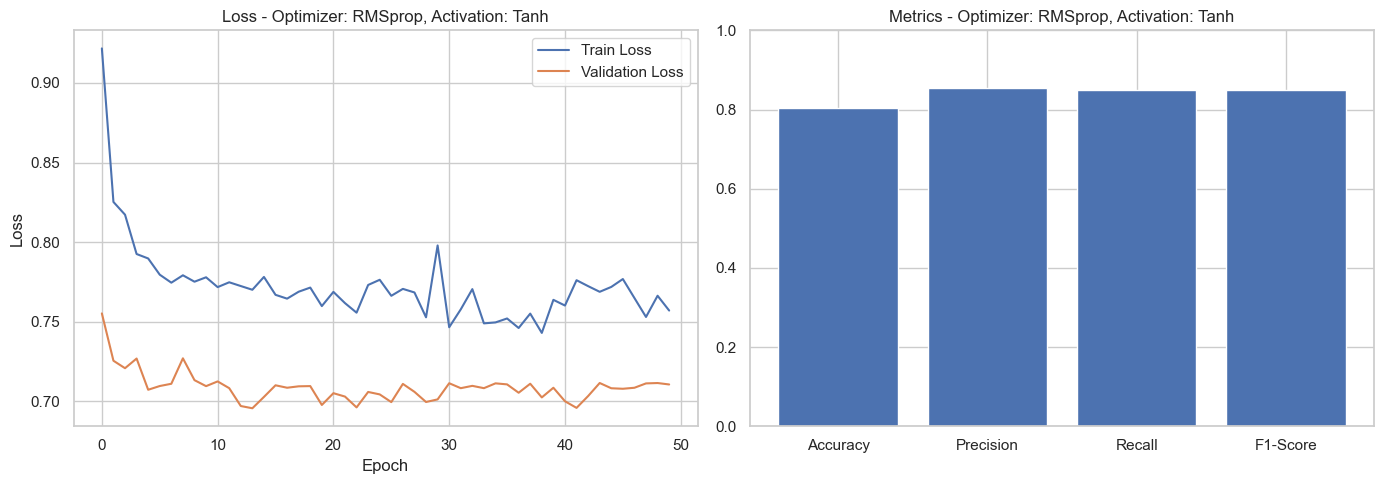

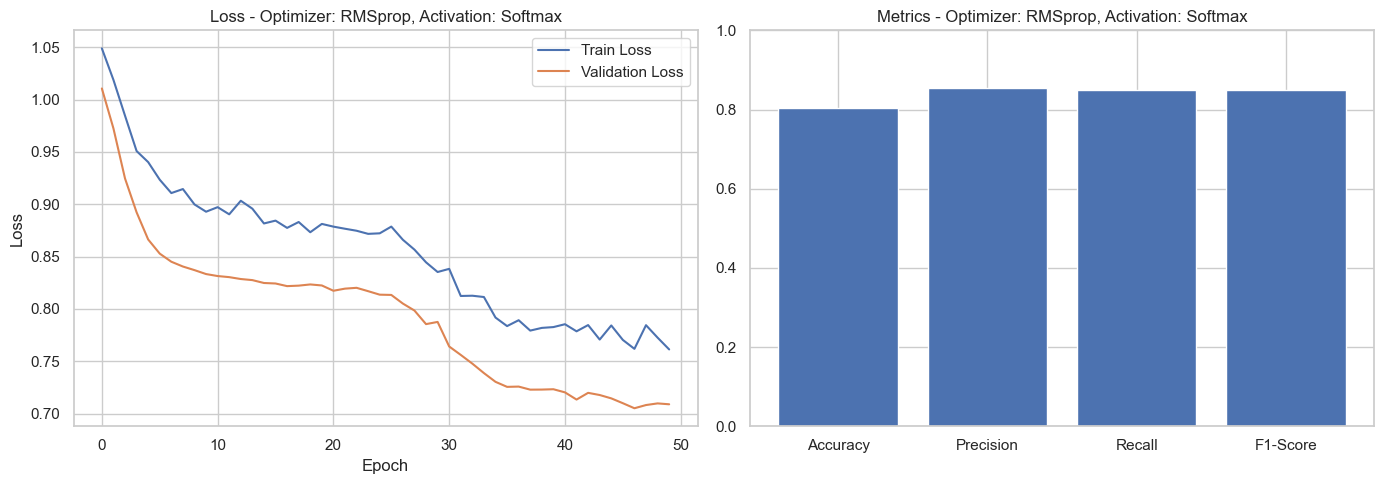

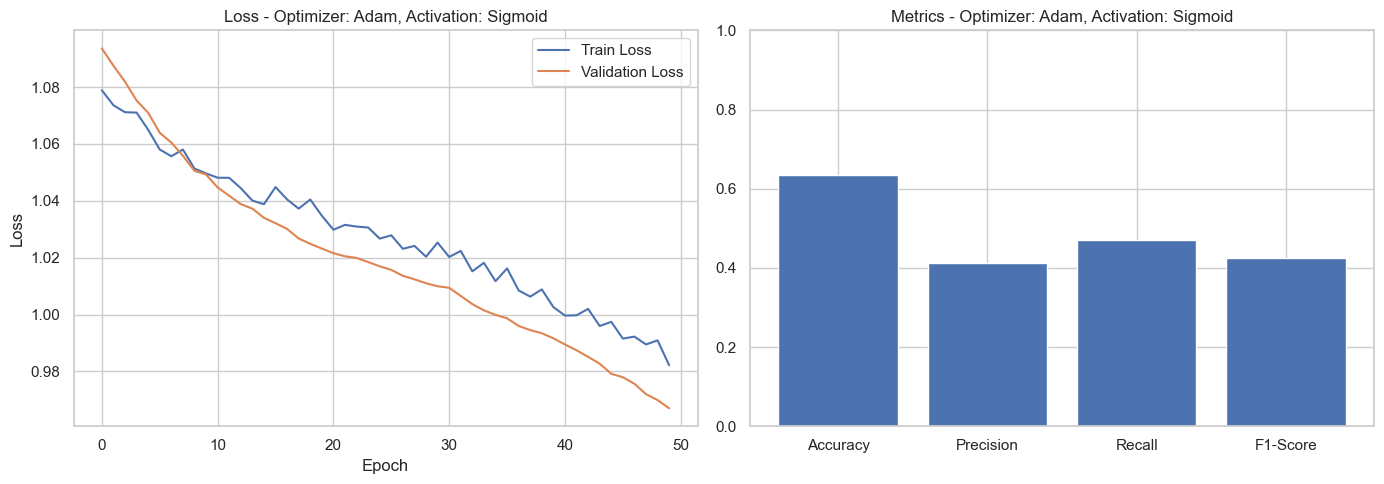

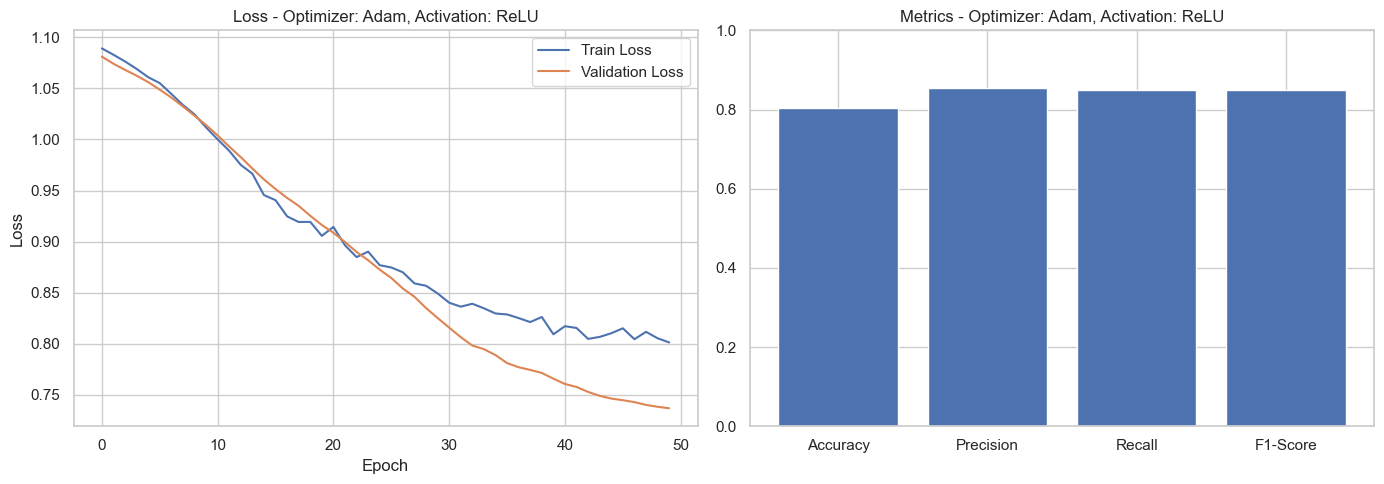

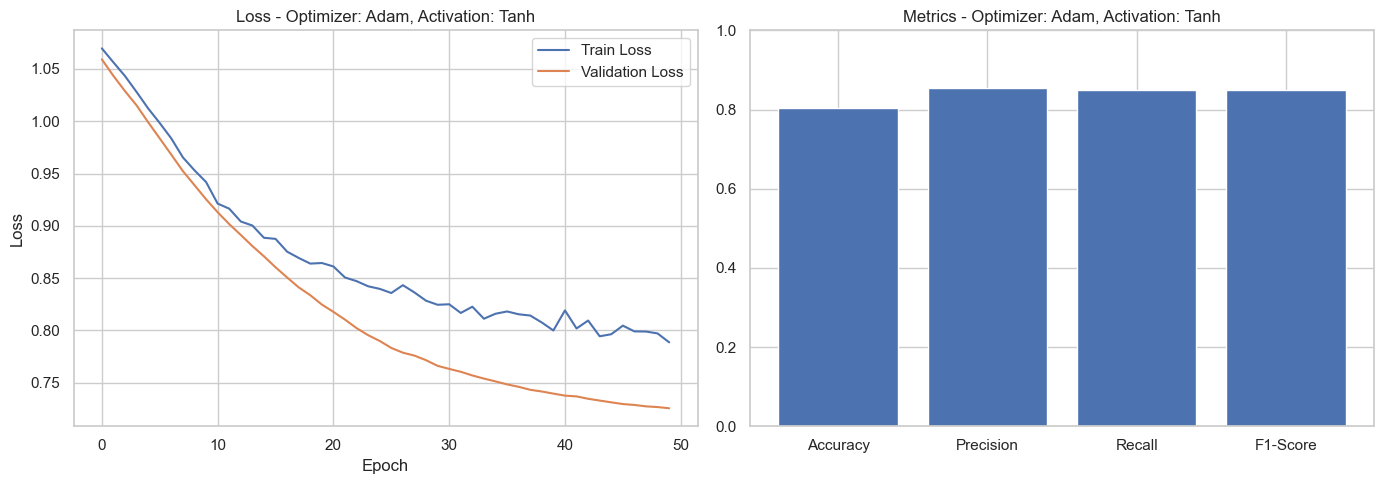

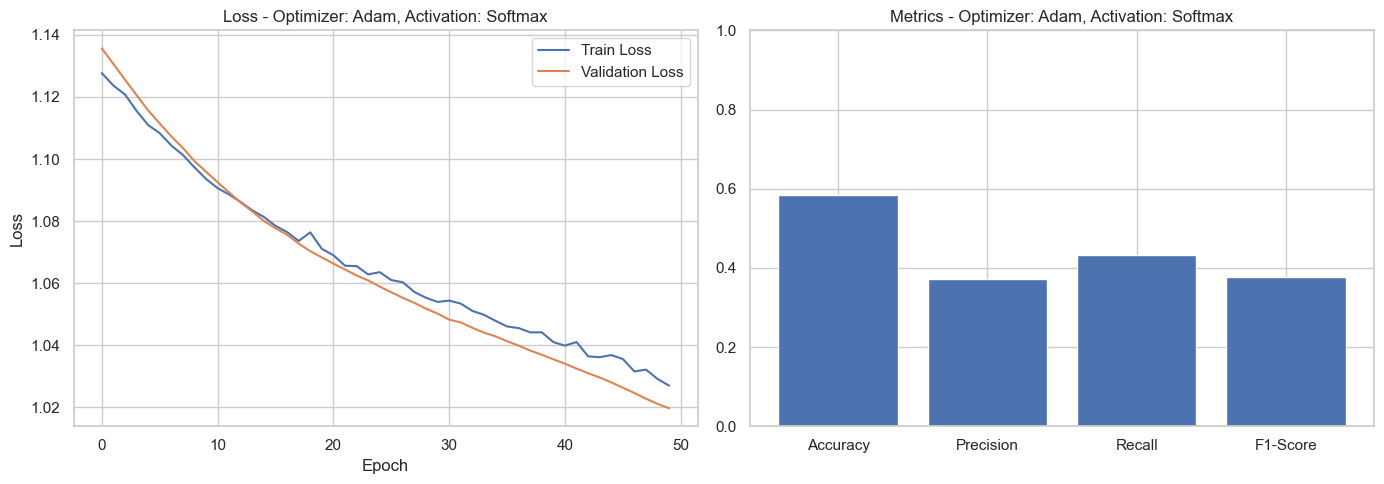

   Optimizer Activation  Train Loss  Val Loss  Accuracy  Precision    Recall  \
0        SGD    Sigmoid    1.051391  1.030383  0.487805   0.236508  0.352941   
1        SGD       ReLU    0.963800  0.963374  0.634146   0.745968  0.564706   
2        SGD       Tanh    0.999347  0.983403  0.731707   0.483092  0.551084   
3        SGD    Softmax    1.067751  1.065268  0.463415   0.154472  0.333333   
4   Adadelta    Sigmoid    1.086948  1.095164  0.463415   0.154472  0.333333   
5   Adadelta       ReLU    1.054848  1.044033  0.439024   0.475000  0.400000   
6   Adadelta       Tanh    1.064243  1.067442  0.560976   0.504505  0.600000   
7   Adadelta    Softmax    1.093911  1.090953  0.414634   0.138211  0.333333   
8    Adagrad    Sigmoid    1.014246  1.000344  0.609756   0.392929  0.450980   
9    Adagrad       ReLU    0.799317  0.729950  0.804878   0.853968  0.849329   
10   Adagrad       Tanh    0.799647  0.735465  0.804878   0.853968  0.849329   
11   Adagrad    Softmax    1.036567  1.0

In [77]:
class SimpleNN(nn.Module):
    def __init__(self, activation_function=nn.ReLU(), output_dim=3):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(2, 16)
        self.fc2 = nn.Linear(16, 8)
        self.fc3 = nn.Linear(8, output_dim)
        self.activation = activation_function
        
    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = torch.softmax(self.fc3(x), dim=1)
        return x

def train_and_evaluate(optimizer_name, activation_function):
    NN = SimpleNN(activation_function=activation_function)
    
    criterion = nn.CrossEntropyLoss()
    
    if optimizer_name == 'SGD':
        optimizer = optim.SGD(NN.parameters(), lr=0.01)
    elif optimizer_name == 'Adadelta':
        optimizer = optim.Adadelta(NN.parameters(), lr=0.01)
    elif optimizer_name == 'Adagrad':
        optimizer = optim.Adagrad(NN.parameters(), lr=0.01)
    elif optimizer_name == 'RMSprop':
        optimizer = optim.RMSprop(NN.parameters(), lr=0.01)
    elif optimizer_name == 'Adam':
        optimizer = optim.Adam(NN.parameters(), lr=0.001)
    
    epochs = 50
    train_losses = []
    val_losses = []
    for epoch in range(epochs):
        NN.train()
        running_loss = 0.0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = NN(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        train_losses.append(running_loss / len(train_loader))
        
        NN.eval()
        val_loss = 0.0
        with torch.no_grad():
            for X_batch, y_batch in test_loader:
                outputs = NN(X_batch)
                loss = criterion(outputs, y_batch)
                val_loss += loss.item()
        val_losses.append(val_loss / len(test_loader))
    
    NN.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = NN(X_batch)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.numpy())
            all_labels.extend(y_batch.numpy())
    
    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds, average='macro', zero_division=0)
    recall = recall_score(all_labels, all_preds, average='macro', zero_division=0)
    f1 = f1_score(all_labels, all_preds, average='macro', zero_division=0)
    
    return train_losses, val_losses, accuracy, precision, recall, f1

# Определение параметров для эксперимента
optimizers = ['SGD', 'Adadelta', 'Adagrad', 'RMSprop', 'Adam']
activations = [nn.Sigmoid(), nn.ReLU(), nn.Tanh(), nn.Softmax(dim=1)]

results = []

# Проведение экспериментов
for optimizer_name in optimizers:
    for activation_function in activations:
        train_losses, val_losses, accuracy, precision, recall, f1 = train_and_evaluate(optimizer_name, activation_function)
        results.append({
            'Optimizer': optimizer_name,
            'Activation': activation_function.__class__.__name__,
            'Train Loss': train_losses[-1],
            'Val Loss': val_losses[-1],
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1
        })
        
        # Построение графиков точности и функции потерь
        plt.figure(figsize=(14, 5))
        plt.subplot(1, 2, 1)
        plt.plot(train_losses, label='Train Loss')
        plt.plot(val_losses, label='Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title(f'Loss - Optimizer: {optimizer_name}, Activation: {activation_function.__class__.__name__}')
        plt.legend()
        
        plt.subplot(1, 2, 2)
        plt.bar(['Accuracy', 'Precision', 'Recall', 'F1-Score'], [accuracy, precision, recall, f1])
        plt.title(f'Metrics - Optimizer: {optimizer_name}, Activation: {activation_function.__class__.__name__}')
        plt.ylim(0, 1)
        
        plt.tight_layout()
        plt.show()

# Создание DataFrame с результатами
results_df = pd.DataFrame(results)
print(results_df)

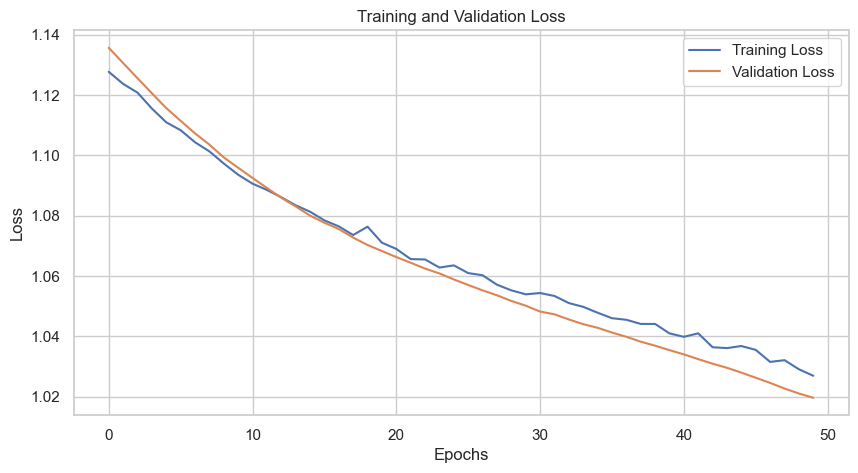

In [79]:
# Plotting training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(range(epochs), train_losses, label='Training Loss')
plt.plot(range(epochs), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [78]:
class SimpleNN(nn.Module):
    def __init__(self, activation_function=nn.ReLU(), output_dim=3):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(2, 16)
        self.fc2 = nn.Linear(16, 8)
        self.fc3 = nn.Linear(8, output_dim)
        self.activation = activation_function
        
    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = torch.softmax(self.fc3(x), dim=1)
        return x

def train_and_evaluate(optimizer_name, activation_function):
    NN = SimpleNN(activation_function=activation_function)
    
    criterion = nn.CrossEntropyLoss()
    
    if optimizer_name == 'SGD':
        optimizer = optim.SGD(NN.parameters(), lr=0.01)
    elif optimizer_name == 'Adadelta':
        optimizer = optim.Adadelta(NN.parameters(), lr=0.01)
    elif optimizer_name == 'Adagrad':
        optimizer = optim.Adagrad(NN.parameters(), lr=0.01)
    elif optimizer_name == 'RMSprop':
        optimizer = optim.RMSprop(NN.parameters(), lr=0.01)
    elif optimizer_name == 'Adam':
        optimizer = optim.Adam(NN.parameters(), lr=0.001)
    
    epochs = 50
    for epoch in range(epochs):
        NN.train()
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = NN(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
    
    NN.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = NN(X_batch)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.numpy())
            all_labels.extend(y_batch.numpy())
    
    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds, average='macro', zero_division=0)
    recall = recall_score(all_labels, all_preds, average='macro', zero_division=0)
    f1 = f1_score(all_labels, all_preds, average='macro', zero_division=0)
    
    return accuracy, precision, recall, f1

# Определение параметров для эксперимента
optimizers = ['SGD', 'Adadelta', 'Adagrad', 'RMSprop', 'Adam']
activations = [nn.Sigmoid(), nn.ReLU(), nn.Tanh(), nn.Softmax(dim=1)]

results = []

# Проведение экспериментов
for optimizer_name in optimizers:
    for activation_function in activations:
        accuracy, precision, recall, f1 = train_and_evaluate(optimizer_name, activation_function)
        results.append({
            'Optimizer': optimizer_name,
            'Activation': activation_function.__class__.__name__,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1
        })

# Создание DataFrame с результатами
results_df = pd.DataFrame(results)
print(results_df.sort_values(by='Accuracy', ascending=False))

   Optimizer Activation  Accuracy  Precision    Recall  F1-Score
13   RMSprop       ReLU  0.829268   0.870833  0.868937  0.869464
10   Adagrad       Tanh  0.804878   0.853968  0.849329  0.850000
9    Adagrad       ReLU  0.804878   0.853968  0.849329  0.850000
18      Adam       Tanh  0.804878   0.853968  0.849329  0.850000
14   RMSprop       Tanh  0.804878   0.853968  0.849329  0.850000
12   RMSprop    Sigmoid  0.804878   0.853968  0.849329  0.850000
17      Adam       ReLU  0.780488   0.837302  0.782663  0.805387
1        SGD       ReLU  0.731707   0.771111  0.788442  0.758137
19      Adam    Softmax  0.731707   0.482500  0.549020  0.510101
2        SGD       Tanh  0.731707   0.784524  0.737255  0.722837
15   RMSprop    Softmax  0.682927   0.453968  0.515996  0.482883
11   Adagrad    Softmax  0.658537   0.489464  0.506708  0.468443
16      Adam    Sigmoid  0.634146   0.412835  0.470588  0.424808
5   Adadelta       ReLU  0.585366   0.424370  0.666667  0.516771
6   Adadelta       Tanh  

In [ ]:
results_df.sort_values(by='Accuracy', ascending=False)

In [ ]:
class SimpleNN(nn.Module):
    def __init__(self, activation_function=nn.ReLU(), output_dim=3):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(2, 16)
        self.fc2 = nn.Linear(16, 8)
        self.fc3 = nn.Linear(8, output_dim)
        self.activation = activation_function
        
    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.fc3(x)
        return x

def train_and_evaluate(optimizer_name, activation_function, loss_function):
    NN = SimpleNN(activation_function=activation_function)
    
    if loss_function == 'CrossEntropyLoss':
        criterion = nn.CrossEntropyLoss()
    elif loss_function == 'MSELoss':
        criterion = nn.MSELoss()
    elif loss_function == 'BCELoss':
        criterion = nn.BCELoss()
    
    if optimizer_name == 'SGD':
        optimizer = optim.SGD(NN.parameters(), lr=0.01)
    elif optimizer_name == 'Adadelta':
        optimizer = optim.Adadelta(NN.parameters(), lr=0.01)
    elif optimizer_name == 'Adagrad':
        optimizer = optim.Adagrad(NN.parameters(), lr=0.01)
    elif optimizer_name == 'RMSprop':
        optimizer = optim.RMSprop(NN.parameters(), lr=0.01)
    elif optimizer_name == 'Adam':
        optimizer = optim.Adam(NN.parameters(), lr=0.001)
    
    epochs = 50
    for epoch in range(epochs):
        NN.train()
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = NN(X_batch)
            
            if loss_function == 'BCELoss' or loss_function == 'MSELoss':
                outputs = torch.sigmoid(outputs) if loss_function == 'BCELoss' else outputs
                y_batch_one_hot = nn.functional.one_hot(y_batch, num_classes=3).float()
                loss = criterion(outputs, y_batch_one_hot)
            else:
                loss = criterion(outputs, y_batch)
            
            loss.backward()
            optimizer.step()
    
    NN.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = NN(X_batch)
            if loss_function == 'BCELoss' or loss_function == 'MSELoss':
                outputs = torch.sigmoid(outputs) if loss_function == 'BCELoss' else outputs
                _, preds = torch.max(outputs, 1)
            else:
                _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.numpy())
            all_labels.extend(y_batch.numpy())
    
    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds, average='macro', zero_division=0)
    recall = recall_score(all_labels, all_preds, average='macro', zero_division=0)
    f1 = f1_score(all_labels, all_preds, average='macro', zero_division=0)
    
    return accuracy, precision, recall, f1

# Определение параметров для эксперимента
optimizers = ['SGD', 'Adadelta', 'Adagrad', 'RMSprop', 'Adam']
activations = [nn.Sigmoid(), nn.ReLU(), nn.Tanh()]
loss_functions = ['CrossEntropyLoss', 'MSELoss', 'BCELoss']

results = []

# Проведение экспериментов
for optimizer_name in optimizers:
    for activation_function in activations:
        for loss_function in loss_functions:
            accuracy, precision, recall, f1 = train_and_evaluate(optimizer_name, activation_function, loss_function)
            results.append({
                'Optimizer': optimizer_name,
                'Activation': activation_function.__class__.__name__,
                'Loss Function': loss_function,
                'Accuracy': accuracy,
                'Precision': precision,
                'Recall': recall,
                'F1-Score': f1
            })

# Создание DataFrame с результатами
results_df = pd.DataFrame(results)

# Вывод таблицы с результатами
print(results_df)

# Построение графиков для визуализации результатов
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")

# График точности
plt.subplot(2, 2, 1)
sns.barplot(x='Accuracy', y='Optimizer', hue='Activation', data=results_df)
plt.title('Accuracy Comparison')

# График precision
plt.subplot(2, 2, 2)
sns.barplot(x='Precision', y='Optimizer', hue='Activation', data=results_df)
plt.title('Precision Comparison')

# График recall
plt.subplot(2, 2, 3)
sns.barplot(x='Recall', y='Optimizer', hue='Activation', data=results_df)
plt.title('Recall Comparison')

# График F1-Score
plt.subplot(2, 2, 4)
sns.barplot(x='F1-Score', y='Optimizer', hue='Activation', data=results_df)
plt.title('F1-Score Comparison')

plt.tight_layout()
plt.show()

In [ ]:
results_df.sort_values(by='Accuracy', ascending=False)

In [ ]:
class SimpleNN(nn.Module):
    def __init__(self, activation_function=nn.Tanh(), output_dim=3):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(2, 16)
        self.fc2 = nn.Linear(16, 8)
        self.fc3 = nn.Linear(8, output_dim)
        self.activation = activation_function
        
    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.fc3(x)
        return x

# Лучшие параметры
optimizer_name = 'RMSprop'
activation_function = nn.Tanh()
loss_function = 'BCELoss'

# Функция обучения и оценки модели
def train_and_evaluate(optimizer_name, activation_function, loss_function):
    NN = SimpleNN(activation_function=activation_function)
    
    if loss_function == 'CrossEntropyLoss':
        criterion = nn.CrossEntropyLoss()
    elif loss_function == 'MSELoss':
        criterion = nn.MSELoss()
    elif loss_function == 'BCELoss':
        criterion = nn.BCELoss()
    
    if optimizer_name == 'SGD':
        optimizer = optim.SGD(NN.parameters(), lr=0.01)
    elif optimizer_name == 'Adadelta':
        optimizer = optim.Adadelta(NN.parameters(), lr=0.01)
    elif optimizer_name == 'Adagrad':
        optimizer = optim.Adagrad(NN.parameters(), lr=0.01)
    elif optimizer_name == 'RMSprop':
        optimizer = optim.RMSprop(NN.parameters(), lr=0.01)
    elif optimizer_name == 'Adam':
        optimizer = optim.Adam(NN.parameters(), lr=0.001)
    
    epochs = 50
    train_losses = []
    val_losses = []
    
    for epoch in range(epochs):
        NN.train()
        running_loss = 0.0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = NN(X_batch)
            
            if loss_function == 'BCELoss' or loss_function == 'MSELoss':
                outputs = torch.sigmoid(outputs) if loss_function == 'BCELoss' else outputs
                y_batch_one_hot = nn.functional.one_hot(y_batch, num_classes=3).float()
                loss = criterion(outputs, y_batch_one_hot)
            else:
                loss = criterion(outputs, y_batch)
            
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        train_losses.append(running_loss / len(train_loader))
        
        # Validation loss
        NN.eval()
        val_loss = 0.0
        with torch.no_grad():
            for X_batch, y_batch in test_loader:
                outputs = NN(X_batch)
                if loss_function == 'BCELoss' or loss_function == 'MSELoss':
                    outputs = torch.sigmoid(outputs) if loss_function == 'BCELoss' else outputs
                    y_batch_one_hot = nn.functional.one_hot(y_batch, num_classes=3).float()
                    loss = criterion(outputs, y_batch_one_hot)
                else:
                    loss = criterion(outputs, y_batch)
                val_loss += loss.item()
        val_losses.append(val_loss / len(test_loader))
    
    # Evaluate on test data
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = NN(X_batch)
            if loss_function == 'BCELoss' or loss_function == 'MSELoss':
                outputs = torch.sigmoid(outputs) if loss_function == 'BCELoss' else outputs
                _, preds = torch.max(outputs, 1)
            else:
                _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.numpy())
            all_labels.extend(y_batch.numpy())
    
    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds, average='macro', zero_division=0)
    recall = recall_score(all_labels, all_preds, average='macro', zero_division=0)
    f1 = f1_score(all_labels, all_preds, average='macro', zero_division=0)
    
    return accuracy, precision, recall, f1, train_losses, val_losses

# Тренировка и оценка модели с лучшими параметрами
accuracy, precision, recall, f1, train_losses, val_losses = train_and_evaluate(optimizer_name, activation_function, loss_function)

# Формирование таблицы результатов
results = [{
    'Optimizer': optimizer_name,
    'Activation': activation_function.__class__.__name__,
    'Loss Function': loss_function,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
}]
results_df = pd.DataFrame(results)

# Вывод таблицы с результатами
print(results_df)

# Построение графика потерь на обучающей и валидационной выборках
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Построение графиков для визуализации результатов
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")

# График точности
plt.subplot(2, 2, 1)
sns.barplot(x='Accuracy', y='Optimizer', data=results_df)
plt.title('Accuracy Comparison')

# График precision
plt.subplot(2, 2, 2)
sns.barplot(x='Precision', y='Optimizer', data=results_df)
plt.title('Precision Comparison')

# График recall
plt.subplot(2, 2, 3)
sns.barplot(x='Recall', y='Optimizer', data=results_df)
plt.title('Recall Comparison')

# График F1-Score
plt.subplot(2, 2, 4)
sns.barplot(x='F1-Score', y='Optimizer', data=results_df)
plt.title('F1-Score Comparison')

plt.tight_layout()
plt.show()

In [ ]:
# Function to train and evaluate model
def train_and_evaluate(activation_function, optimizer_type, layers):
    class SimpleNN(nn.Module):
        def __init__(self):
            super(SimpleNN, self).__init__()
            self.layers = nn.ModuleList()
            input_dim = 2
            for output_dim in layers:
                self.layers.append(nn.Linear(input_dim, output_dim))
                input_dim = output_dim
            self.output = nn.Linear(input_dim, 3)
            
        def forward(self, x):
            for layer in self.layers:
                x = activation_function(layer(x))
            x = torch.softmax(self.output(x), dim=1)
            return x

    model = SimpleNN()

    criterion = nn.CrossEntropyLoss()
    optimizer = optimizer_type(model.parameters(), lr=0.001)

    epochs = 50
    for epoch in range(epochs):
        model.train()
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.numpy())
            all_labels.extend(y_batch.numpy())

    report = classification_report(all_labels, all_preds)
    accuracy = accuracy_score(all_labels, all_preds)

    return accuracy, report

# Experiment configurations
configurations = [
    {'activation': torch.relu, 'optimizer': optim.Adam, 'layers': [16, 8]},
    {'activation': torch.relu, 'optimizer': optim.SGD, 'layers': [16, 8]},
    {'activation': torch.tanh, 'optimizer': optim.Adam, 'layers': [16, 8]},
    {'activation': torch.tanh, 'optimizer': optim.SGD, 'layers': [16, 8]},
    {'activation': torch.sigmoid, 'optimizer': optim.Adam, 'layers': [16, 8]},
    {'activation': torch.sigmoid, 'optimizer': optim.SGD, 'layers': [16, 8]},
    {'activation': torch.relu, 'optimizer': optim.Adam, 'layers': [32, 16, 8]},
    {'activation': torch.relu, 'optimizer': optim.SGD, 'layers': [32, 16, 8]}
]

# Running experiments and collecting results
results = []
for config in configurations:
    accuracy, report = train_and_evaluate(config['activation'], config['optimizer'], config['layers'])
    results.append({
        'Activation': config['activation'].__name__,
        'Optimizer': config['optimizer'].__name__,
        'Layers': config['layers'],
        'Accuracy': accuracy,
        'Report': report
    })

# Display results
for result in results:
    print(f"Configuration: Activation={result['Activation']}, Optimizer={result['Optimizer']}, Layers={result['Layers']}")
    print(f"Accuracy: {result['Accuracy']}")
    print(f"Classification Report:\n{result['Report']}")
    print("\n" + "="*80 + "\n")

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Selecting features and target
X = data[['Course Absence Rate', 'PF']]
y = data['Class']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# One-hot encoding the target variable
y_train_encoded = to_categorical(y_train - 1)  # subtracting 1 to make the classes zero-indexed
y_test_encoded = to_categorical(y_test - 1)

model = Sequential([
    Dense(16, input_dim=2, activation='relu'),
    Dense(8, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes for output
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train_encoded, epochs=50, batch_size=10, validation_split=0.2)

y_pred = model.predict(X_test_scaled)
y_pred_classes = y_pred.argmax(axis=1) + 1  # converting back to the original class labels

# Generating classification report
report = classification_report(y_test, y_pred_classes)
accuracy = accuracy_score(y_test, y_pred_classes)

print("Classification Report:\n", report)
print("Accuracy:", accuracy)
